Cоздать новую колонку "Sex" и заполнить ее значениями по умолчанию для каждого набора данных (moscow_female.csv и moscow_male.csv)

In [1]:
import numpy as np
import pandas as pd
dfm = pd.read_csv('moscow_male.csv', encoding='windows-1251', sep=';')
dff = pd.read_csv('moscow_female.csv', encoding='windows-1251', sep=';')
dfm = dfm.drop('Unnamed: 6', axis=1)
dff = dff.drop('Unnamed: 6', axis=1)
dfm = dfm[dfm['ID'] != 'ID']
dff = dff[dff['ID'] != 'ID']
dfm['Sex'] = 'Male'
dff['Sex'] = 'Female'

print(dfm)


        ID       Name NumberOfPersons  global_id  Year     Month   Sex
0        1  Александр             253   37750243  2015    январь  Male
1        2     Михаил             247   37750244  2015    январь  Male
2        3       Иван             226   37750245  2015    январь  Male
3        4     Максим             208   37750246  2015    январь  Male
4        5      Артём             190   37750247  2015    январь  Male
...    ...        ...             ...        ...   ...       ...   ...
4499  5396  Святослав               7  894568752  2018  сентябрь  Male
4500  5397     Даниль               7  894568785  2018  сентябрь  Male
4501  5398      Тихон               7  894568808  2018  сентябрь  Male
4502  5399      Имран               7  894568838  2018  сентябрь  Male
4503  5400      Назар               7  894568866  2018  сентябрь  Male

[4500 rows x 7 columns]


Объединить оба набора данных в один датафрейм (например , merge по полю "Year")

In [2]:
df = pd.concat([dfm, dff], ignore_index=True)
df.describe()


,ID,Name,NumberOfPersons,global_id,Year,Month,Sex
count,9000,9000,9000,9000,9000,9000,9000
unique,4500,374,312,9000,4,12,2
top,1,Александр,8,37750243,2015,январь,Male
freq,2,45,515,1,2400,800,4500


Выделить последнюю букву имени в именах мальчика или девочки

In [3]:
df['LastVerb'] = df['Name'].apply(lambda x: x[-1])
print(df)

        ID       Name NumberOfPersons  global_id  Year     Month     Sex  \
0        1  Александр             253   37750243  2015    январь    Male   
1        2     Михаил             247   37750244  2015    январь    Male   
2        3       Иван             226   37750245  2015    январь    Male   
3        4     Максим             208   37750246  2015    январь    Male   
4        5      Артём             190   37750247  2015    январь    Male   
...    ...        ...             ...        ...   ...       ...     ...   
8995  5396     Мариам               8  894619931  2018  сентябрь  Female   
8996  5397      Аниса               8  894619962  2018  сентябрь  Female   
8997  5398    Мелания               7  894619999  2018  сентябрь  Female   
8998  5399      Аделя               7  894620024  2018  сентябрь  Female   
8999  5400       Лада               7  894620055  2018  сентябрь  Female   

     LastVerb  
0           р  
1           л  
2           н  
3           м  
4      

Визуализировать зависимость последней буквы в имени от пола

<AxesSubplot:xlabel='LastVerb', ylabel='count'>

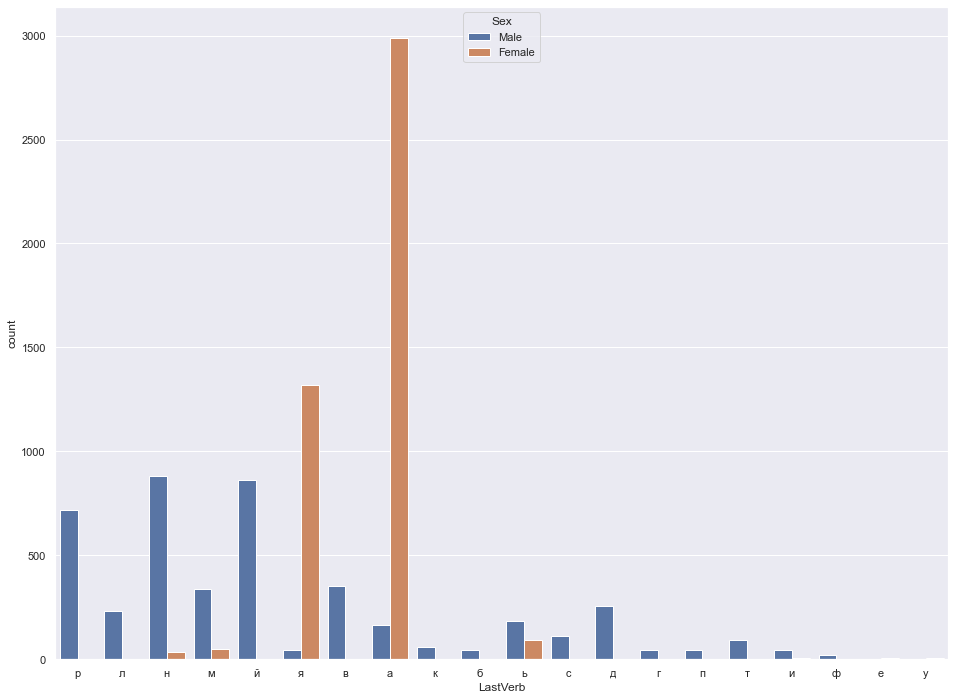

In [4]:
import seaborn as sb
sb.set(rc={"figure.figsize":(16,12)})
sb.countplot(x='LastVerb', hue='Sex', data=df)

Написать функцию, которая на основе любого введеного имени, подбирает к нему обращение ("Г-жа" и "Г-дин")

In [21]:
from random import randint

grouped = df.groupby(["LastVerb", "Sex"])["ID"].count()
#print(grouped)

def get_article_by_name(name):
    sexByNameInDf = df[df['Name'] == name]['Sex'].unique()
    if sexByNameInDf.size != 0:
        return sexByNameInDf[0]
    
    lc = name[-1]
    maleWithLc = grouped.get((lc, "Male"), default=0)
    femaleWithLc = grouped.get((lc, "Female"), default=0)

    if maleWithLc > femaleWithLc:
        return "Male"
    elif femaleWithLc > maleWithLc:
        return "Female"
    else: return "Male" if randint(0, 1) == 0 else "Female"

def hello_with_article(name):
    article = 'Господин' if get_article_by_name(name) == 'Male' else 'Госпожа'
    print(f"Добрый день, {article} {name}")

hello_with_article('Екатерина')

Добрый день, Госпожа Екатерина
